## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\andrea\A\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\andrea\A\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

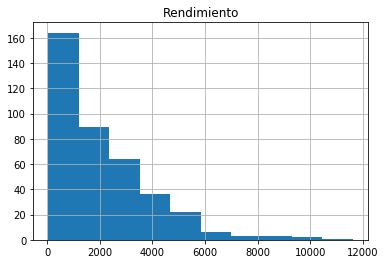

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 10.0, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 10000.0, 'epsilon': 1.0, 'gamma': 0.01}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[ 643.24399791 1279.99401821 1986.28786823 1040.28568494 3025.98511828
 1441.52174643  518.37682397 1779.35037721  941.3207126  2297.40929151
 2131.39035696 1764.37666198 1663.29894215 1481.09412296 2719.48870554
 2231.96809142 2918.57824352  797.58228022 1050.63129029 2466.16399704
  149.33418549 1785.02398618 2574.72906497 2525.28674691 2580.74781579
  985.71416596 1829.6024912   447.49485562 1291.04122664  903.55490394
 1315.62088511  831.66240121 1392.00819709 1052.32293322 1137.08772602
 1150.87944047 1277.53270267 2847.5579941  1762.51926325 1000.03231985
  288.60565832 1485.53145634 2006.8822577  1109.48731801 1061.889328
 2674.77283656 2535.82582404 1212.17856234 2432.665345   2264.67652638
 1126.88591722 2738.01221266 2658.13146637 2819.72509008 1126.98213737
 2800.32103169 2191.47054575 1558.39630235  649.11874123  555.67204407
 1002.17244984  853.90663592 2660.91699436 2408.42978606 2539.73861899
  782.28300577 1070.86915957  737.16235033 1968.20516863 2161.72134075
 2582.07

In [23]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[   84.10225885   214.59916475   339.51660724  1532.28596532
  -1224.81151674 -1028.53624607  1488.32261022 -1692.32226347
   1310.92592423   853.98390326  -423.24662462 -2258.29931896
   2218.63165155]]


In [15]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.14112831946711368

In [16]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[ 643.24399791 1279.99401821 1986.28786823 1040.28568494 3025.98511828
 1441.52174643  518.37682397 1779.35037721  941.3207126  2297.40929151
 2131.39035696 1764.37666198 1663.29894215 1481.09412296 2719.48870554
 2231.96809142 2918.57824352  797.58228022 1050.63129029 2466.16399704
  149.33418549 1785.02398618 2574.72906497 2525.28674691 2580.74781579
  985.71416596 1829.6024912   447.49485562 1291.04122664  903.55490394
 1315.62088511  831.66240121 1392.00819709 1052.32293322 1137.08772602
 1150.87944047 1277.53270267 2847.5579941  1762.51926325 1000.03231985
  288.60565832 1485.53145634 2006.8822577  1109.48731801 1061.889328
 2674.77283656 2535.82582404 1212.17856234 2432.665345   2264.67652638
 1126.88591722 2738.01221266 2658.13146637 2819.72509008 1126.98213737
 2800.32103169 2191.47054575 1558.39630235  649.11874123  555.67204407
 1002.17244984  853.90663592 2660.91699436 2408.42978606 2539.73861899
  782.28300577 1070.86915957  737.16235033 1968.20516863 2161.72134075
 2582.07

In [17]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.14112831946711368

In [18]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [19]:
reg.best_params_

{'C': 10000.0, 'kernel': 'linear'}

### Cross Validation

In [20]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
    y_lin = svr_lin.predict(x2_test)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: -2592001942955.6797
RMSE: 2771643426.5810
MAE: 2570629681.9264


### Hold Out Validation

In [21]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(20):
    X1_train,X1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2, random_state=12) #Hacer partición de datos en entrenamiento y prueba

    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
    y_lin = svr_lin.predict(X1_test)
    
    r_2=r2_score(y1_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y1_test-y_lin,2)/np.sqrt(len(y1_test))))
    MAE.append(median_absolute_error(y1_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y1_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: -1600244746579.4780
RMSE: 295236005.6328
MAE: 2639256088.2407
